角度ごとの距離減衰調査


In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_tukey_spectrum_amplitude
from positioning.sound_db import TukeyDB
from positioning import tools

In [3]:
sns.set_style("whitegrid")

In [4]:
directions = np.arange(-40, 50, 10)
distances = np.arange(1, 2.25, 0.25)

In [5]:
signals = [
    [
        readwav(f"../data/reference-phone-distance/d{int(d*100)}a{a}.wav")[:, 1]
        for d in distances
    ]
    for a in directions
]
len(signals)

9

In [8]:
spectrum = []
amplitude = []
for signal in signals:
    spec = []
    ampli = []
    for s in signal:
        spe = []
        amp = []
        for i in range(10):
            sp, am = get_tukey_spectrum_amplitude(
                s[i * 96000 : (i + 2) * 96000],
                first_freq=15000,
                last_freq=22000,
                ampli_band="all",
            )
            spe.append(sp)
            amp.append(am)
        spec.append(spe)
        ampli.append(amp)
    spectrum.append(spec)
    amplitude.append(ampli)
amplitude = np.array(amplitude)
amplitude.shape

(9, 5, 10)

In [13]:
df_amplitude = pd.DataFrame()
for ampli, a in zip(amplitude, directions):
    for d, amp in zip(distances, ampli):
        df_amplitude = pd.concat(
            [
                df_amplitude,
                pd.DataFrame(
                    {
                        "direction": a,
                        "distance": d,
                        "amplitude": amp,
                    }
                ),
            ]
        )
df_amplitude.reset_index(drop=True, inplace=True)
df_amplitude

,direction,distance,amplitude
0,-40,1.0,0.524114
1,-40,1.0,0.517547
2,-40,1.0,0.521830
3,-40,1.0,0.521013
4,-40,1.0,0.520209
...,...,...,...
445,40,2.0,0.184624
446,40,2.0,0.186419
447,40,2.0,0.189614
448,40,2.0,0.188544


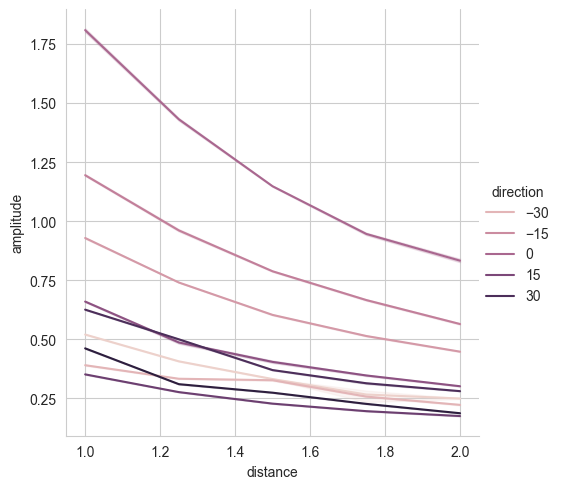

In [15]:
sns.relplot(df_amplitude, x="distance", y="amplitude", hue="direction", kind="line")

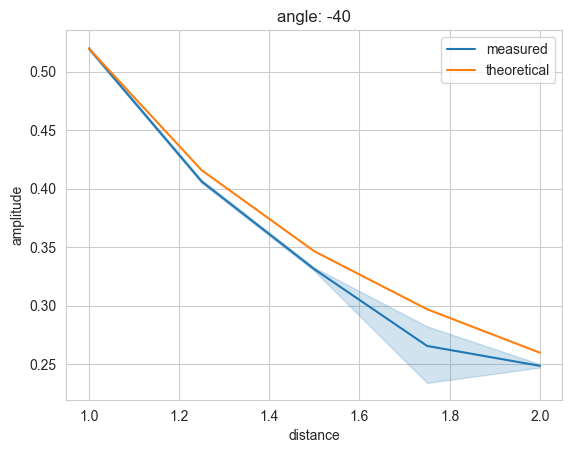

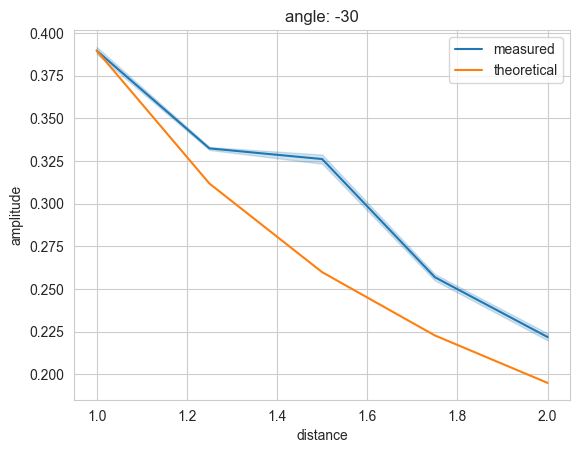

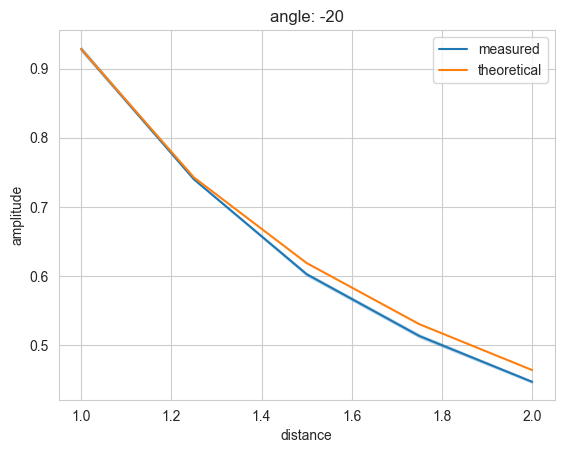

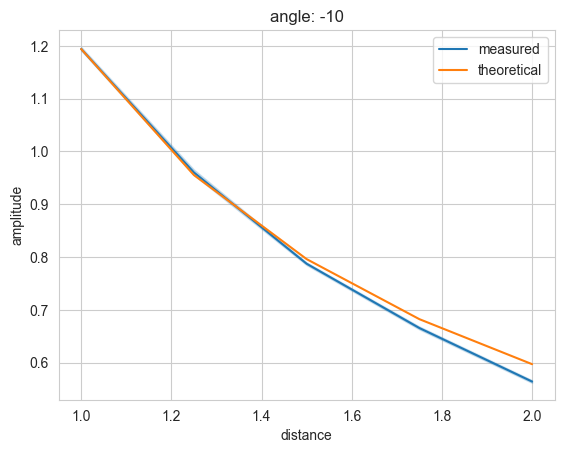

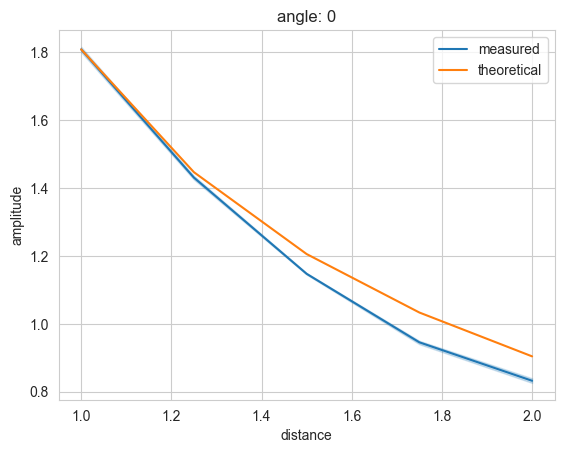

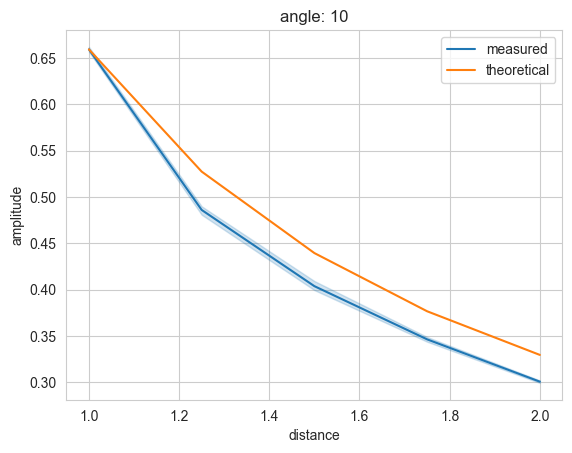

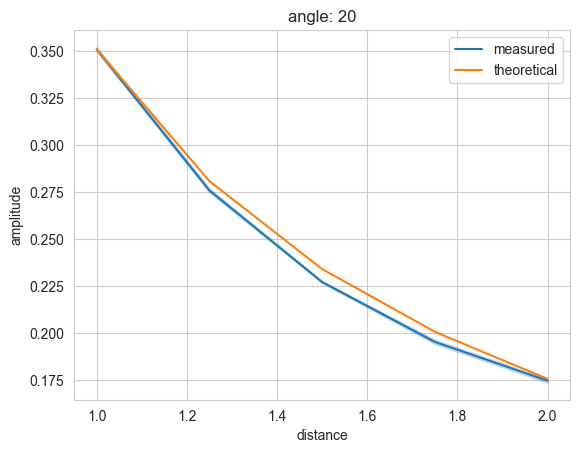

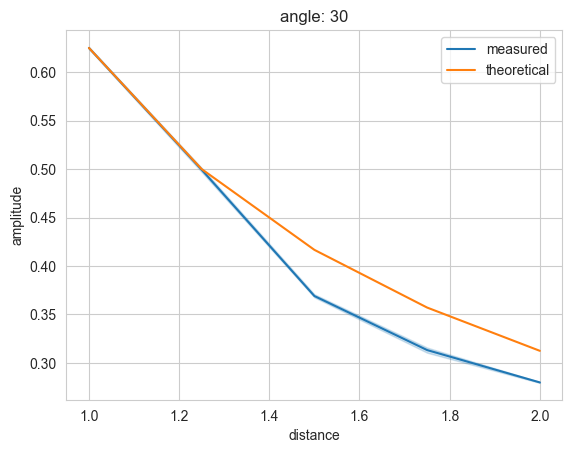

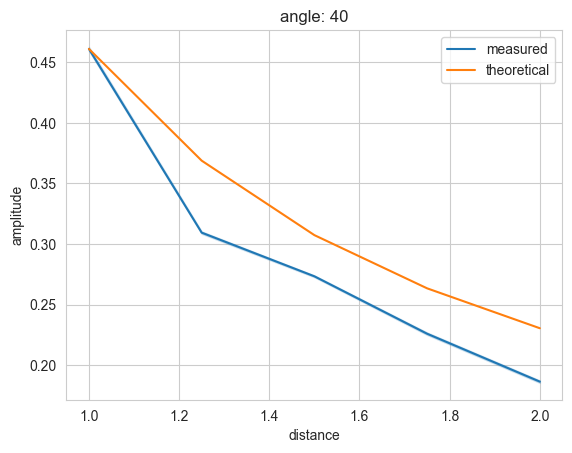

In [21]:
for angle in directions:
    current = df_amplitude.query("direction == @angle")
    base = current.query("distance == 1.0")["amplitude"].mean()
    theoretical = base / distances
    sns.lineplot(current, x="distance", y="amplitude", label="measured")
    sns.lineplot(x=distances, y=theoretical, label="theoretical")
    plt.legend()
    plt.title(f"angle: {angle}")
    plt.show()

In [22]:
spectrum = np.array(spectrum)
spectrum.shape

(9, 5, 10, 28)

In [23]:
freqs = np.arange(15000, 22000, 250)
freqs

array([15000, 15250, 15500, 15750, 16000, 16250, 16500, 16750, 17000,
       17250, 17500, 17750, 18000, 18250, 18500, 18750, 19000, 19250,
       19500, 19750, 20000, 20250, 20500, 20750, 21000, 21250, 21500,
       21750])

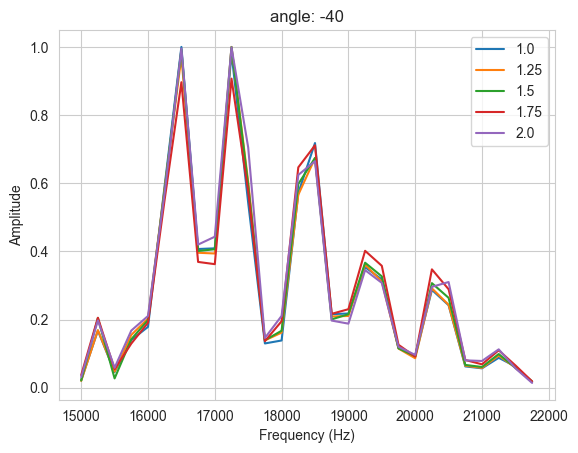

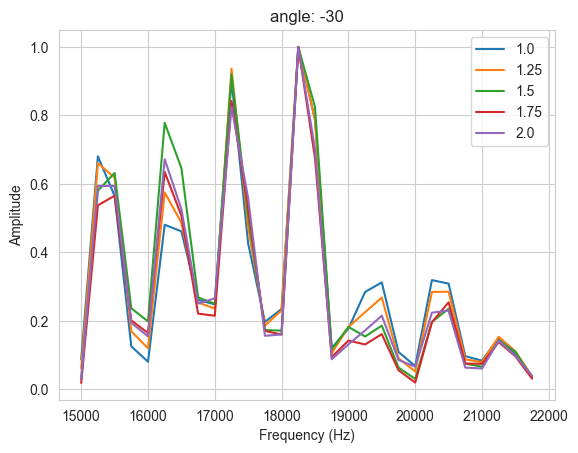

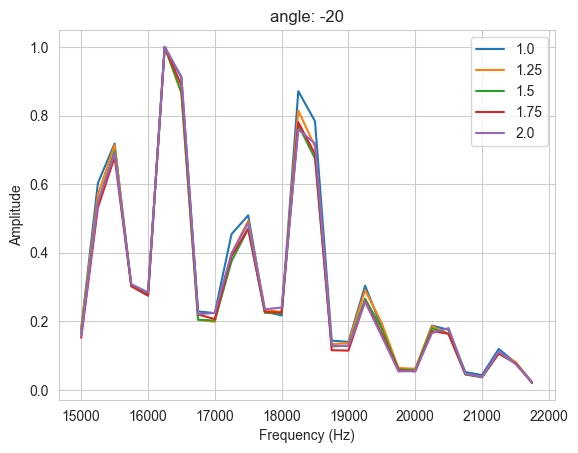

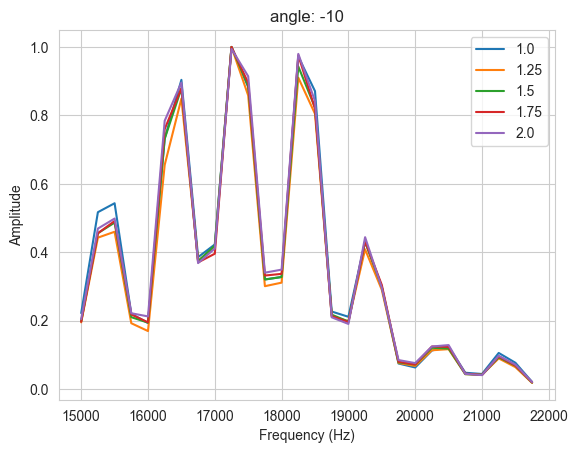

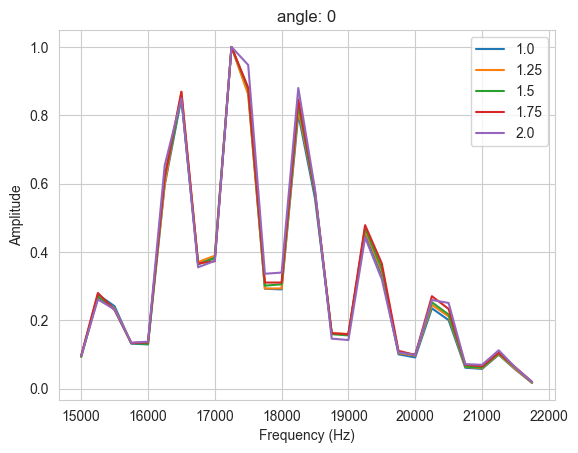

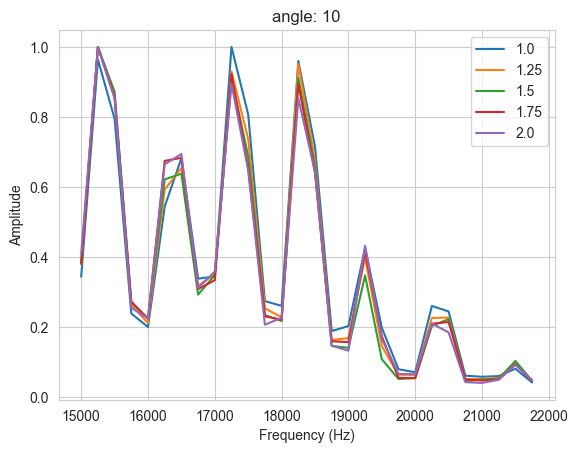

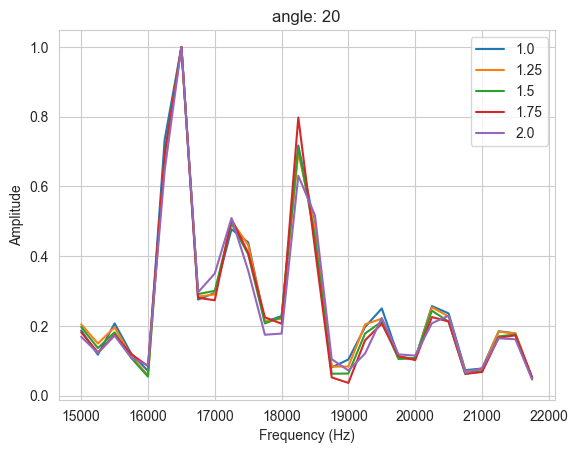

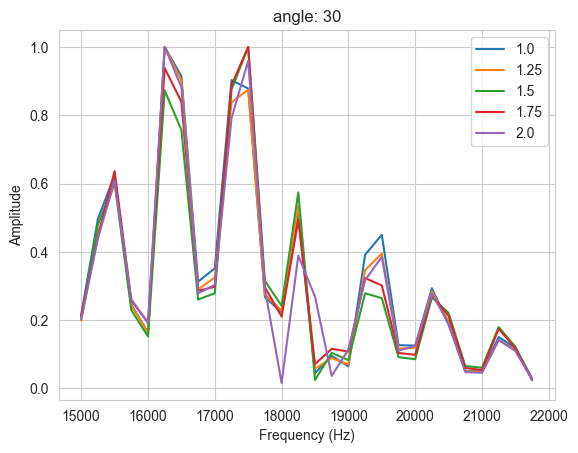

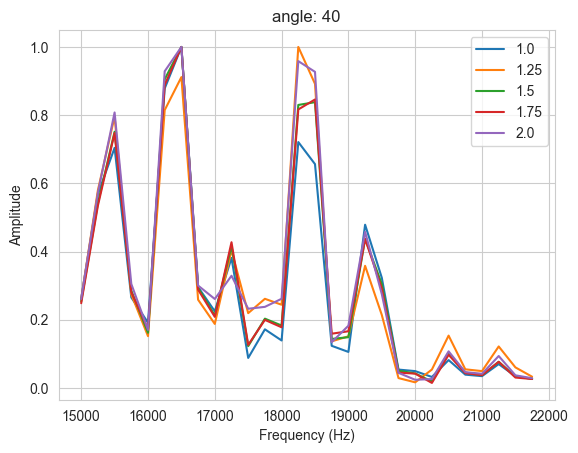

In [27]:
for angle, spec in zip(directions, spectrum):
    for d, sp in zip(distances, spec):
        plt.plot(freqs, np.mean(sp, axis=0), label=f"{d}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.title(f"angle: {angle}")
    plt.show()